In [6]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [7]:
crypto_currency = input('Enter the ticker symbol ')
currency = input('Currency ')
start = dt.datetime(2015,1,1)
end = dt.datetime.now()
df = web.DataReader(f'{crypto_currency}-{currency}','yahoo',start,end)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(df['Close'].values.reshape(-1,1))
days = 90
predict_for = int(input('Enter the number of days to predict the price for '))

Enter the ticker symbol BTC
Currency USD
Enter the number of days to predict the price for 30


In [8]:
scaled_df

array([[0.00224381],
       [0.00214994],
       [0.00216231],
       ...,
       [0.51049943],
       [0.52862822],
       [0.5122409 ]])

In [9]:
x_train,y_train = [],[]
for i in range(days,len(scaled_df) - predict_for):
    x_train.append(scaled_df[i-days:i,0])
    y_train.append(scaled_df[i + predict_for,0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
model = Sequential()
model.add(LSTM(units = 80, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 80))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 30, batch_size = 45)

Epoch 1/30
50/50 [==============================] - 20s 243ms/step - loss: 0.0199
Epoch 2/30
50/50 [==============================] - 11s 214ms/step - loss: 0.0053
Epoch 3/30
50/50 [==============================] - 11s 210ms/step - loss: 0.0042
Epoch 4/30
50/50 [==============================] - 9s 189ms/step - loss: 0.0053
Epoch 5/30
50/50 [==============================] - 13s 266ms/step - loss: 0.0045
Epoch 6/30
50/50 [==============================] - 13s 263ms/step - loss: 0.0040
Epoch 7/30
50/50 [==============================] - 11s 224ms/step - loss: 0.0051
Epoch 8/30
50/50 [==============================] - 11s 216ms/step - loss: 0.0035
Epoch 9/30
50/50 [==============================] - 10s 205ms/step - loss: 0.0027
Epoch 10/30
50/50 [==============================] - 9s 188ms/step - loss: 0.0027
Epoch 11/30
50/50 [==============================] - 9s 187ms/step - loss: 0.0032
Epoch 12/30
50/50 [==============================] - 9s 187ms/step - loss: 0.0029
Epoch 13/30
50/50

In [14]:
start_test = dt.datetime(2020,1,1)
end_test = dt.datetime.now()
test_df = web.DataReader(f'{crypto_currency}-{currency}','yahoo',start_test,end_test)
correct_prices = test_df['Close'].values
data = pd.concat((df['Close'], test_df['Close']), axis = 0)
input = data[len(data) - len(test_df) - days:].values
input = input.reshape(-1,1)
input = scaler.fit_transform(input)

In [15]:
x_test = []
for i in range(days,len(input)):
    x_test.append(input[i - days:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
predicted_price = model.predict(x_test)
predicted_price = scaler.inverse_transform(predicted_price)

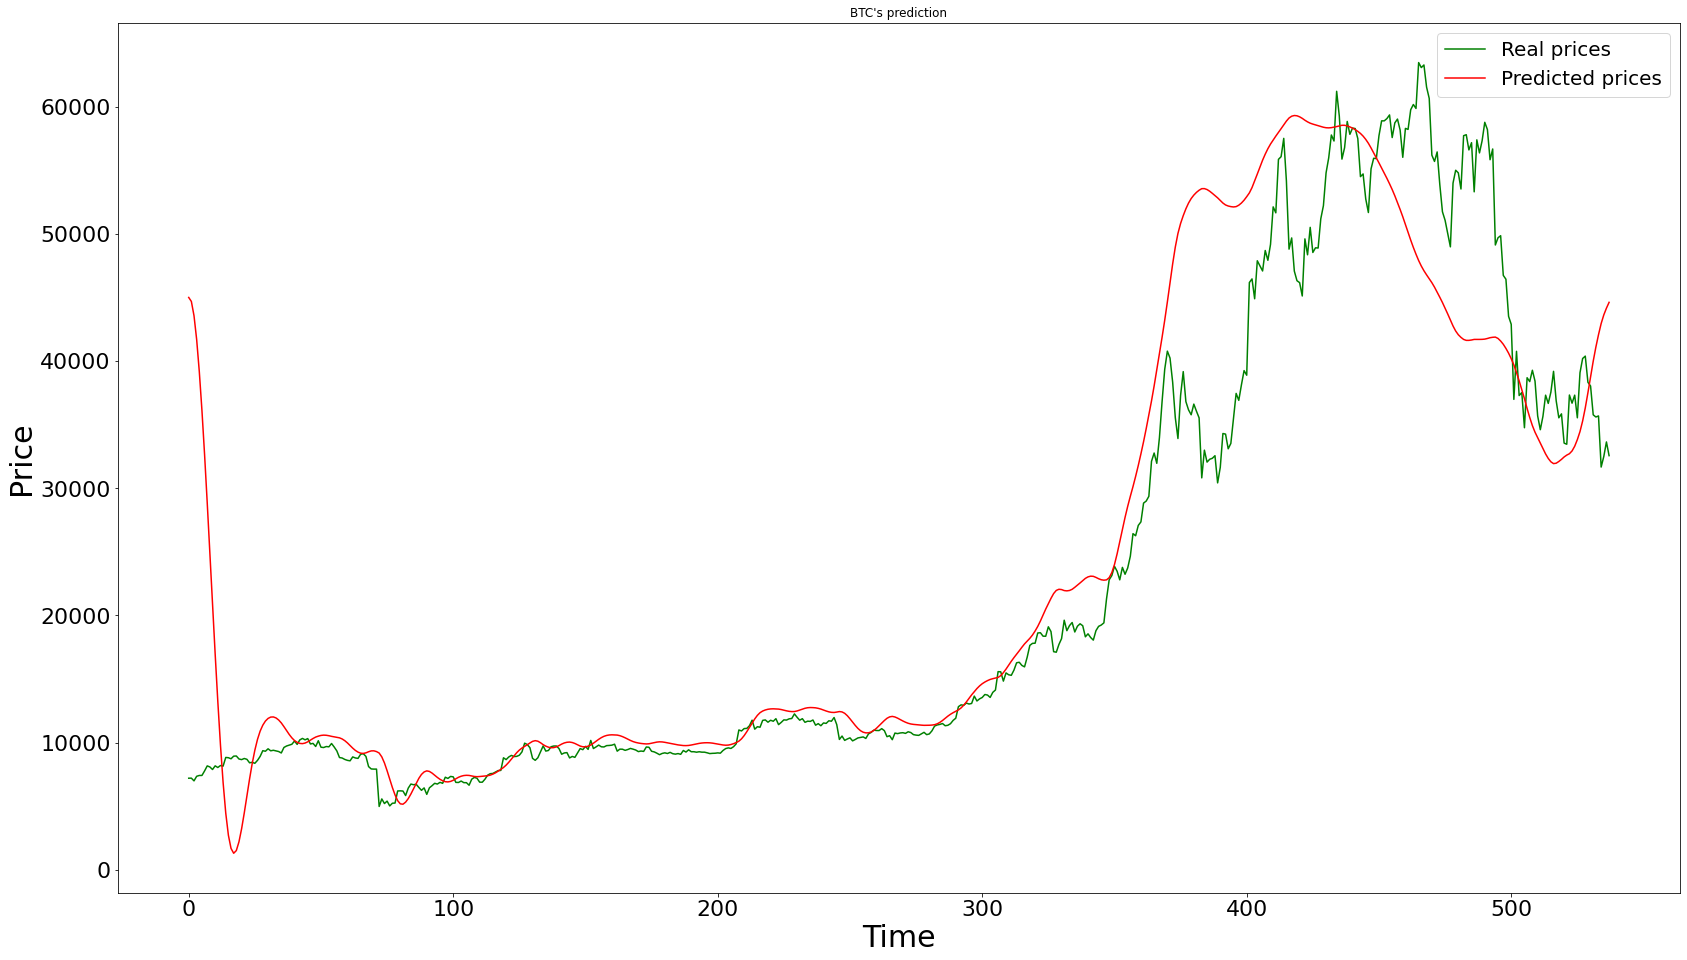

In [16]:
plt.figure(figsize = (28,16),edgecolor = ('black'))
plt.plot(correct_prices, color = 'green', label = 'Real prices')
plt.plot(predicted_price, color = 'red', label = 'Predicted prices')
plt.title(f"{crypto_currency}'s prediction")
plt.xlabel('Time',size = 30)
plt.xticks(size = 22)
plt.ylabel('Price',size = 30)
plt.yticks(size = 22)
plt.legend(loc = 'upper right',prop = {'size':20})
plt.show()

In [17]:
dataset = [input[len(input) + 1 - days:len(input) + 1, 0]]
dataset = np.array(dataset)
dataset = np.reshape(dataset, (dataset.shape[0],dataset.shape[1], 1))
prediction = model.predict(dataset)
prediction = scaler.inverse_transform(predicted_price)
print(prediction)

[[2.63533645e+09]
 [2.61686451e+09]
 [2.55111654e+09]
 [2.44166118e+09]
 [2.29384730e+09]
 [2.11477005e+09]
 [1.91073779e+09]
 [1.68891814e+09]
 [1.45740096e+09]
 [1.22311885e+09]
 [9.92788352e+08]
 [7.74256256e+08]
 [5.74423424e+08]
 [4.01315264e+08]
 [2.60481952e+08]
 [1.58619168e+08]
 [9.75987840e+07]
 [7.54290240e+07]
 [8.78637920e+07]
 [1.28314600e+08]
 [1.88543408e+08]
 [2.61071744e+08]
 [3.38993184e+08]
 [4.17190880e+08]
 [4.88730816e+08]
 [5.50020672e+08]
 [5.99815616e+08]
 [6.37828608e+08]
 [6.65198912e+08]
 [6.84383232e+08]
 [6.96440320e+08]
 [7.02647744e+08]
 [7.03300480e+08]
 [6.98730048e+08]
 [6.89274624e+08]
 [6.75798656e+08]
 [6.58646720e+08]
 [6.40178944e+08]
 [6.22509056e+08]
 [6.06904512e+08]
 [5.94528832e+08]
 [5.86258432e+08]
 [5.81392192e+08]
 [5.80326720e+08]
 [5.83084352e+08]
 [5.88684224e+08]
 [5.96390144e+08]
 [6.04036864e+08]
 [6.10577280e+08]
 [6.14857216e+08]
 [6.18128128e+08]
 [6.19493888e+08]
 [6.18834816e+08]
 [6.16771072e+08]
 [6.13902208e+08]
 [6.115968